# Spark DataFrame

## PySparkの準備

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Data_wrangling').getOrCreate()

your 131072x1 screen size is bogus. expect trouble


23/02/12 22:41:32 WARN Utils: Your hostname, NONAME resolves to a loopback address: 127.0.1.1; using 172.18.233.170 instead (on interface eth0)
23/02/12 22:41:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/12 22:41:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### ファイルの読み込み

In [4]:
df = spark.read.format("csv")\
    .option("inferSchema", "True") \
    .option("header", "True") \
    .option("sep", ",") \
    .load("./data/Online_Retail.csv")

In [5]:
df

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: int, Country: string]

In [6]:
df.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS S

In [7]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



### スキーマを指定してファイル読み込み

In [8]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DateType

In [9]:
schema = StructType([
    StructField("InvoiceNo", StringType(), False),
    StructField("StockCode", StringType(), False),
    StructField("Description", StringType(), False),
    StructField("Quantity", IntegerType(), False),
    StructField("InvoiceDate", DateType(), False),
    StructField("UnitPrice", FloatType(), False),
    StructField("CustomerID", StringType(), False),
    StructField("Country", StringType(), False)
])

In [10]:
df = spark.read.format("csv")\
    .option("header", "True") \
    .option("sep", ",") \
    .load("./data/Online_Retail.csv", schema=schema)

In [11]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [12]:
df.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'date'),
 ('UnitPrice', 'float'),
 ('CustomerID', 'string'),
 ('Country', 'string')]

### Select: 列を選択してデータ抽出

In [13]:
df.select('StockCode', 'Description').show()

+---------+--------------------+
|StockCode|         Description|
+---------+--------------------+
|   85123A|WHITE HANGING HEA...|
|    71053| WHITE METAL LANTERN|
|   84406B|CREAM CUPID HEART...|
|   84029G|KNITTED UNION FLA...|
|   84029E|RED WOOLLY HOTTIE...|
|    22752|SET 7 BABUSHKA NE...|
|    21730|GLASS STAR FROSTE...|
|    22633|HAND WARMER UNION...|
|    22632|HAND WARMER RED P...|
|    84879|ASSORTED COLOUR B...|
|    22745|POPPY'S PLAYHOUSE...|
|    22748|POPPY'S PLAYHOUSE...|
|    22749|FELTCRAFT PRINCES...|
|    22310|IVORY KNITTED MUG...|
|    84969|BOX OF 6 ASSORTED...|
|    22623|BOX OF VINTAGE JI...|
|    22622|BOX OF VINTAGE AL...|
|    21754|HOME BUILDING BLO...|
|    21755|LOVE BUILDING BLO...|
|    21777|RECIPE BOX WITH M...|
+---------+--------------------+
only showing top 20 rows



In [14]:
# 行数カウント
df.count()

541909

### filter: 条件を満たすレコードの抽出

In [15]:
df.filter(df['UnitPrice']>30).show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536392|    22827|RUSTIC  SEVENTEEN...|       1| 2010-12-01|    165.0|     13705|United Kingdom|
|   536396|    22803|IVORY EMBROIDERED...|       2| 2010-12-01|    35.75|     17850|United Kingdom|
|   536406|    22803|IVORY EMBROIDERED...|       2| 2010-12-01|    35.75|     17850|United Kingdom|
|   536540|       C2|            CARRIAGE|       1| 2010-12-01|     50.0|     14911|          EIRE|
|   536544|    22769|CHALKBOARD KITCHE...|       1| 2010-12-01|    51.02|      null|United Kingdom|
|   536544|    22847|BREAD BIN DINER S...|       1| 2010-12-01|     34.0|      null|United Kingdom|
|   536544|      DOT|      DOTCOM POSTAGE|       1| 2010-12-01|   569.77|      null|United Kingdom|


In [16]:
df.filter(df['Country']=="Switzerland").count()

2002

### where: 条件を満たすレコードの抽出

In [17]:
df.where(df['Description'].contains("WATER")).show(truncate=False)

+---------+---------+-----------------------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate|UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+-----------+---------+----------+--------------+
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |2010-12-01 |3.39     |17850     |United Kingdom|
|536373   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |2010-12-01 |3.39     |17850     |United Kingdom|
|536375   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |2010-12-01 |3.39     |17850     |United Kingdom|
|536376   |22114    |HOT WATER BOTTLE TEA AND SYMPATHY  |48      |2010-12-01 |3.45     |15291     |United Kingdom|
|536390   |21485    |RETROSPOT HEART HOT WATER BOTTLE   |24      |2010-12-01 |4.25     |17511     |United Kingdom|
|536390   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|24      |2010-12-01 |3.

### 列の作成と削除

In [99]:
# 列の作成 withColumn
df.withColumn("amount", df['UnitPrice']*df['Quantity']).show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|   amount|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|15.299999|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|     22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|     15.3|
|   536365

In [147]:
df = df.withColumn("amount", df['UnitPrice']*df['Quantity'])

In [148]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|   amount|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|15.299999|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|     22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|     15.3|
|   536365

In [21]:
# 列の削除 drop
df.drop('amount').show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [22]:
df = df.drop('amount')
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [23]:
df.drop("InvoiceNo", "StockCode").show()

+--------------------+--------+-----------+---------+----------+--------------+
|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+--------------------+--------+-----------+---------+----------+--------------+
|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|
|HAND WARMER UNION...|       6| 2010-12-01|     1.85|     17850|United Kingdom|
|HAND WARMER RED P...|       6| 2010-12-01|     1.85|     17850|United Kingdom|
|ASSORTED COLOUR B...|      32| 2010-12-

### 列名の変更

In [24]:
df.withColumnRenamed("Country", "Country_name").columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country_name']

### キャスト（型変換）

In [25]:
df.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'date'),
 ('UnitPrice', 'float'),
 ('CustomerID', 'string'),
 ('Country', 'string')]

In [26]:
# cast
df.withColumn("Quantity", df["Quantity"].cast("float"))

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: float, InvoiceDate: date, UnitPrice: float, CustomerID: string, Country: string]

### 日付の処理

In [28]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [29]:
df.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'date'),
 ('UnitPrice', 'float'),
 ('CustomerID', 'string'),
 ('Country', 'string')]

In [30]:
from pyspark.sql.functions import year, month, dayofmonth

In [35]:
df_tmp = df.withColumn("purchased_year", year("InvoiceDate"))
df_tmp = df_tmp.withColumn("purchased_month", month("InvoiceDate"))
df_tmp = df_tmp.withColumn("purchased_day", dayofmonth("InvoiceDate"))

df_tmp.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+--------------+---------------+-------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|purchased_year|purchased_month|purchased_day|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+--------------+---------------+-------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|          2010|             12|            1|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|          2010|             12|            1|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|          2010|             12|            1|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|          2010|             12|

In [36]:
df_tmp.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+--------------+---------------+-------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|purchased_year|purchased_month|purchased_day|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+--------------+---------------+-------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|          2010|             12|            1|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|          2010|             12|            1|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|          2010|             12|            1|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|          2010|             12|

### 欠損値処理

In [37]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [41]:
#isNull
df[df["InvoiceNo"].isNull()].show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [42]:
df[df["Description"].isNull()].show()

+---------+---------+-----------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+-----------+--------+-----------+---------+----------+--------------+
|   536414|    22139|       null|      56| 2010-12-01|      0.0|      null|United Kingdom|
|   536545|    21134|       null|       1| 2010-12-01|      0.0|      null|United Kingdom|
|   536546|    22145|       null|       1| 2010-12-01|      0.0|      null|United Kingdom|
|   536547|    37509|       null|       1| 2010-12-01|      0.0|      null|United Kingdom|
|   536549|   85226A|       null|       1| 2010-12-01|      0.0|      null|United Kingdom|
|   536550|    85044|       null|       1| 2010-12-01|      0.0|      null|United Kingdom|
|   536552|    20950|       null|       1| 2010-12-01|      0.0|      null|United Kingdom|
|   536553|    37461|       null|       3| 2010-12-01|      0.0|      null|United Kingdom|

In [43]:
df[df["Description"].isNull()].count()

1454

In [47]:
# isnan
from pyspark.sql.functions import isnan

In [48]:
df[isnan(df["Description"])].count()

0

In [49]:
df[isnan(df["UnitPrice"])].count()

0

In [51]:
# 欠損値の埋め fillna
df = df.fillna("unknown", subset=["Description"])

In [52]:
df.filter(df["Description"]=="unknown").count()

1454

In [53]:
df[df["Description"].isNull()].count()

0

In [55]:
# 欠損値の削除 dropna
df[df["CustomerID"].isNull()].count()

135080

In [56]:
df.count()

541909

In [ ]:
df.dropna("any").count()

406829

### 集計

In [59]:
df.groupby(df["Description"]).count().show()

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|10 COLOUR SPACEBO...|  327|
|SET/10 BLUE POLKA...|  249|
|POTTING SHED SOW ...|    2|
|PAPERWEIGHT KINGS...|   24|
|WOVEN BERRIES CUS...|   89|
|WHITE/PINK MINI C...|    7|
|SET/3 RED GINGHAM...|  494|
|MAGNETS PACK OF 4...|  128|
|WHITE CHRYSANTHEM...|    9|
|WHITE FRANGIPANI ...|   18|
|SILVER FABRIC MIRROR|   46|
|PINK  HONEYCOMB P...|   70|
|PINK BOUDOIR T-LI...|    1|
| BLACK CHERRY LIGHTS|    3|
|IVORY ENCHANTED F...|   93|
|ANTIQUE SILVER TE...|  227|
|BLUE FELT HANGING...|    2|
|PACK OF 12 COLOUR...|  223|
|   CLAM SHELL SMALL |   48|
|TWO DOOR CURIO CA...|   96|
+--------------------+-----+
only showing top 20 rows



In [63]:
from pyspark.sql.functions import desc, asc

In [62]:
df.groupby(df["Description"]).count().sort(desc("count")).show(truncate=False)

+----------------------------------+-----+
|Description                       |count|
+----------------------------------+-----+
|WHITE HANGING HEART T-LIGHT HOLDER|2369 |
|REGENCY CAKESTAND 3 TIER          |2200 |
|JUMBO BAG RED RETROSPOT           |2159 |
|PARTY BUNTING                     |1727 |
|LUNCH BAG RED RETROSPOT           |1638 |
|ASSORTED COLOUR BIRD ORNAMENT     |1501 |
|SET OF 3 CAKE TINS PANTRY DESIGN  |1473 |
|unknown                           |1454 |
|PACK OF 72 RETROSPOT CAKE CASES   |1385 |
|LUNCH BAG  BLACK SKULL.           |1350 |
|NATURAL SLATE HEART CHALKBOARD    |1280 |
|POSTAGE                           |1252 |
|JUMBO BAG PINK POLKADOT           |1251 |
|HEART OF WICKER SMALL             |1237 |
|JAM MAKING SET WITH JARS          |1229 |
|JUMBO STORAGE BAG SUKI            |1214 |
|PAPER CHAIN KIT 50'S CHRISTMAS    |1210 |
|JUMBO SHOPPER VINTAGE RED PAISLEY |1202 |
|LUNCH BAG CARS BLUE               |1197 |
|LUNCH BAG SPACEBOY DESIGN         |1192 |
+----------

In [64]:
df.groupby(df["Description"]).count().sort(asc("count")).show(truncate=False)

+-----------------------------------+-----+
|Description                        |count|
+-----------------------------------+-----+
|amazon sales                       |1    |
|BLACK CHRISTMAS FLOCK DROPLET      |1    |
|BREAD BIN, DINER STYLE, MINT       |1    |
|TEA TIME BREAKFAST BASKET          |1    |
|ETCHED GLASS STAR TREE DECORATION  |1    |
|PINK BOUDOIR T-LIGHT HOLDER        |1    |
|4 GOLD FLOCK CHRISTMAS BALLS       |1    |
|PINK MARSHMALLOW SCARF KNITTING KIT|1    |
|DUSTY PINK CHRISTMAS TREE 30CM     |1    |
|PINK BERTIE MOBILE PHONE CHARM     |1    |
|FLAMINGO LIGHTS                    |1    |
|BLACKCHRISTMAS TREE 30CM           |1    |
|CURIOUS IMAGES SCRAP BOOK SET      |1    |
|VINTAGE BLUE TINSEL REEL           |1    |
|TEA TIME CAKE STAND IN GIFT BOX    |1    |
|PURPLE CHUNKY GLASS+BEAD NECKLACE  |1    |
|PINK DOLLY HAIR CLIPS              |1    |
|GARLAND, MAGIC GARDEN 1.8M         |1    |
|KEEP OUT GIRLS DOOR HANGER         |1    |
|VINTAGE GOLD TINSEL REEL       

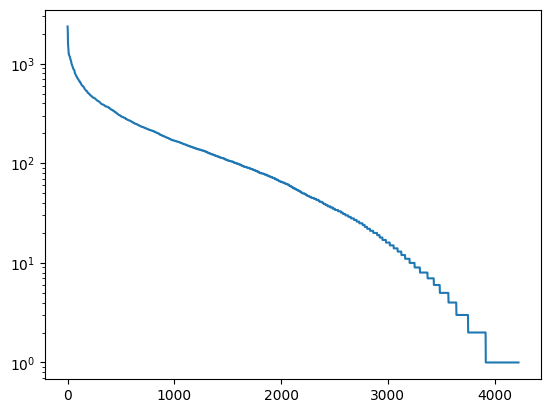

In [89]:
from matplotlib import pyplot as plt
import numpy as np
dd = df.groupby(df["Description"]).count().sort(desc("count"))
x = np.arange(dd.count())
y = dd.select("count").toPandas()["count"]
plt.plot(x,y)
ax = plt.gca()
# ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

### 統計量

In [90]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [94]:
df.describe(["Quantity", "UnitPrice"]).show()

+-------+------------------+-----------------+
|summary|          Quantity|        UnitPrice|
+-------+------------------+-----------------+
|  count|            541909|           541909|
|   mean|  9.55224954743324|4.611113614622466|
| stddev|218.08115785023313|96.75985330031489|
|    min|            -80995|        -11062.06|
|    max|             80995|          38970.0|
+-------+------------------+-----------------+



In [95]:
df.describe(["Quantity", "UnitPrice"]).summary().show()

+-------+-------+------------------+------------------+
|summary|summary|          Quantity|         UnitPrice|
+-------+-------+------------------+------------------+
|  count|      5|                 5|                 5|
|   mean|   null|108427.32668147954|113983.66219338297|
| stddev|   null| 248999.6817895434| 239971.3667821116|
|    min|  count|            -80995|         -11062.06|
|    25%|   null|  9.55224954743324| 4.611113614622466|
|    50%|   null|218.08115785023313| 96.75985330031489|
|    75%|   null|           80995.0|           38970.0|
|    max| stddev|  9.55224954743324| 96.75985330031489|
+-------+-------+------------------+------------------+



In [96]:
## 平均
df.select("Quantity").groupby().mean().show()

+----------------+
|   avg(Quantity)|
+----------------+
|9.55224954743324|
+----------------+



### 定数列

In [97]:
from pyspark.sql.functions import lit

In [98]:
df.withColumn("test", lit(1)).show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+----+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|test|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+----+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|   1|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|   1|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|   1|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|   1|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|   1|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|   1|
|   536365|    21730|GLASS STAR FROSTE...|       6| 201

In [100]:
from pyspark.sql.functions import when, col
df_tmp = df.withColumn("cancel_value", when(col("Quantity") < 0, lit("9999")).otherwise(lit("1")))

In [101]:
df_tmp.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|cancel_value|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|           1|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|           1|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|           1|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|           1|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|           1|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingd

In [103]:
df_tmp.filter(df_tmp["cancel_value"]==9999).show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|cancel_value|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+------------+
|  C536379|        D|            Discount|      -1| 2010-12-01|     27.5|     14527|United Kingdom|        9999|
|  C536383|   35004C|SET OF 3 COLOURED...|      -1| 2010-12-01|     4.65|     15311|United Kingdom|        9999|
|  C536391|    22556|PLASTERS IN TIN C...|     -12| 2010-12-01|     1.65|     17548|United Kingdom|        9999|
|  C536391|    21984|PACK OF 12 PINK P...|     -24| 2010-12-01|     0.29|     17548|United Kingdom|        9999|
|  C536391|    21983|PACK OF 12 BLUE P...|     -24| 2010-12-01|     0.29|     17548|United Kingdom|        9999|
|  C536391|    21980|PACK OF 12 RED RE...|     -24| 2010-12-01|     0.29|     17548|United Kingd

### ユニーク


In [104]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [105]:
df.select("Country").distinct().show()

+---------------+
|        Country|
+---------------+
|         Sweden|
|        Germany|
|         France|
|        Belgium|
|        Finland|
|          Italy|
|           EIRE|
|      Lithuania|
|         Norway|
|          Spain|
|        Denmark|
|        Iceland|
|         Israel|
|Channel Islands|
|         Cyprus|
|    Switzerland|
|          Japan|
|         Poland|
|       Portugal|
|      Australia|
+---------------+
only showing top 20 rows



In [106]:
df.select("Country").distinct().count()

38

### 重複処理

In [107]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [112]:
df.dropDuplicates(["InvoiceNo"]).count()

25900

In [113]:
df.select(["InvoiceNo"]).distinct().count()

25900

### Whenによる条件分岐

In [114]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [115]:
from pyspark.sql.functions import when

In [116]:
df_new = df.withColumn("PriceCategory", 
        when(df["UnitPrice"] > 15, "expensive")
        .when((df["UnitPrice"] <= 15) & (df["UnitPrice"] > 5), "medium")
        .when((df["UnitPrice"] <= 5) & (df["UnitPrice"] > 0), "cheap")
        .otherwise("unknown")
        )

In [117]:
df_new.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|PriceCategory|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|        cheap|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|        cheap|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|        cheap|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|        cheap|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|        cheap|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|Unit

### PandasとPysparkの変換

In [118]:
type(df)

pyspark.sql.dataframe.DataFrame

In [119]:
df_pandas = df.toPandas()

In [120]:
df_pandas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [121]:
type(df_pandas)

pandas.core.frame.DataFrame

### DataFrame作成とJoin

In [125]:
df1 = spark.createDataFrame( [(1, "apple"), (2, "orange"), (3, None), (4, "banana"), (None, "grapes")], ["id", "value"])
df1.show()

Traceback (most recent call last):
  File "/home/kz/workspace/PySpark_Udemy/.venv/lib/python3.11/site-packages/pyspark/serializers.py", line 458, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kz/workspace/PySpark_Udemy/.venv/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "/home/kz/workspace/PySpark_Udemy/.venv/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 602, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kz/workspace/PySpark_Udemy/.venv/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 692, in reducer_override
    return self._function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kz/workspace/PySpark_Udemy/.venv/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 565, in _function_reduce
    return s

PicklingError: Could not serialize object: IndexError: tuple index out of range

### ファイル出力

In [126]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [127]:
df.write.format("csv").option("delimiter", ",").save("./data/save_dataframe")

In [128]:
# 分散保存されたデータフレームをひとつにまとめて保存
df.coalesce(1).write.format("csv").option("delimiter", ",").save("./data/save_coalesce_dataframe")

In [129]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6| 2010-12-01|     4.25|     17850|United Kingdom|


In [130]:
df_tmp = df.withColumn("purchase_year", year("InvoiceDate"))\
    .withColumn("purchase_month", month("InvoiceDate"))
df_tmp.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|purchase_year|purchase_month|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|         2010|            12|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|         2010|            12|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|         2010|            12|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|         2010|            12|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdo

In [131]:
df_tmp.write.partitionBy("purchase_year", "purchase_month").format("csv")\
        .option("delimiter", ",").save("./data/save_partition_dataframe")

### Spark SQL

In [150]:
df.show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|   amount|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|15.299999|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|     22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|     15.3|
|   536365

In [151]:
df.registerTempTable("temp_data")

In [152]:
spark.sql("select * from temp_data limit 10").show()

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|   amount|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+---------+
|   536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01|     2.55|     17850|United Kingdom|15.299999|
|   536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01|     2.75|     17850|United Kingdom|     22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01|     3.39|     17850|United Kingdom|    20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2| 2010-12-01|     7.65|     17850|United Kingdom|     15.3|
|   536365

In [153]:
spark.sql("select Country, sum(amount) from temp_data group by Country").show()

+---------------+------------------+
|        Country|       sum(amount)|
+---------------+------------------+
|         Sweden|36595.909824848175|
|        Germany|  221698.209764719|
|         France|197403.89954146743|
|        Belgium| 40910.96015048027|
|        Finland|22326.740027189255|
|          Italy| 16890.50998854637|
|           EIRE| 263276.8190498352|
|      Lithuania|1661.0599565505981|
|         Norway| 35163.45992398262|
|          Spain| 54774.58020196855|
|        Denmark| 18768.14003944397|
|        Iceland| 4310.000016212463|
|         Israel| 7907.820026576519|
|Channel Islands|20086.289966583252|
|         Cyprus| 12946.28997451067|
|    Switzerland|   56385.350043118|
|          Japan| 35340.61988157034|
|         Poland| 7213.140019655228|
|       Portugal|29367.019920021296|
|      Australia|137077.26984500885|
+---------------+------------------+
only showing top 20 rows

